In [ ]:
#Support Vector Machine(SVM):

Using TensorFlow backend.


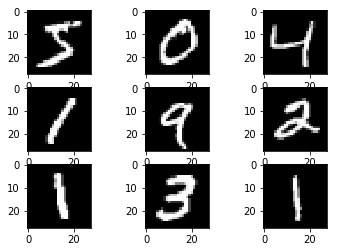

In [1]:
#SVM
import matplotlib.pyplot as plt
from keras.datasets import mnist 
from matplotlib import pyplot 

# load data 
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

# create a grid of 3x3 images 
for i in range(0, 9): 
    pyplot.subplot(330 + 1 + i) 
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the plot
pyplot.show()

# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [2]:
#Print Shapes
print("X_train shape: %s" % repr(X_train.shape))
print("y_train shape: %s" % repr(y_train.shape))
print("X_test shape: %s" % repr(X_test.shape))
print("y_test shape: %s" % repr(y_test.shape))

X_train shape: (60000, 784)
y_train shape: (60000,)
X_test shape: (10000, 784)
y_test shape: (10000,)


In [3]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
svm = LinearSVC()
svm.fit(X_train, y_train);
svm.predict(X_train)

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
scores =  cross_val_score(svm, X_train, y_train, cv=5)
print("scores: %s  mean: %f  std: %f" % (str(scores), np.mean(scores), np.std(scores)))

scores: [ 0.91436901  0.90834861  0.90691667  0.90464283  0.91955652]  mean: 0.910767  std: 0.005448


In [5]:
#Score on test data
svm.score(X_test, y_test)

0.91800000000000004

In [6]:
#Score on training data
svm.score(X_train, y_train)

0.92631666666666668

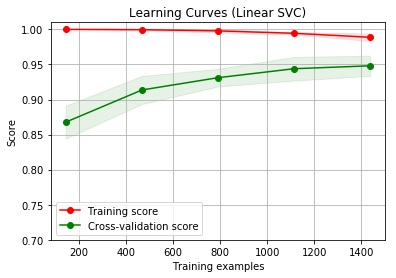

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

digits = load_digits()
X, y = digits.data, digits.target

title = "Learning Curves (Linear SVC)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = svm
plot_learning_curve(estimator, title,  X, y, (0.7, 1.01), cv=cv, n_jobs=4)

plt.show()